This code is designed to analyze and visualize the changes in several physiological and psychological parameters across three states ("Before," "During," and "After"). 

By calculating and plotting the medians and providing counts of non-NaN observations, it provides insights into how these parameters vary under different conditions, ensuring robust statistical representation and clear communication of findings.

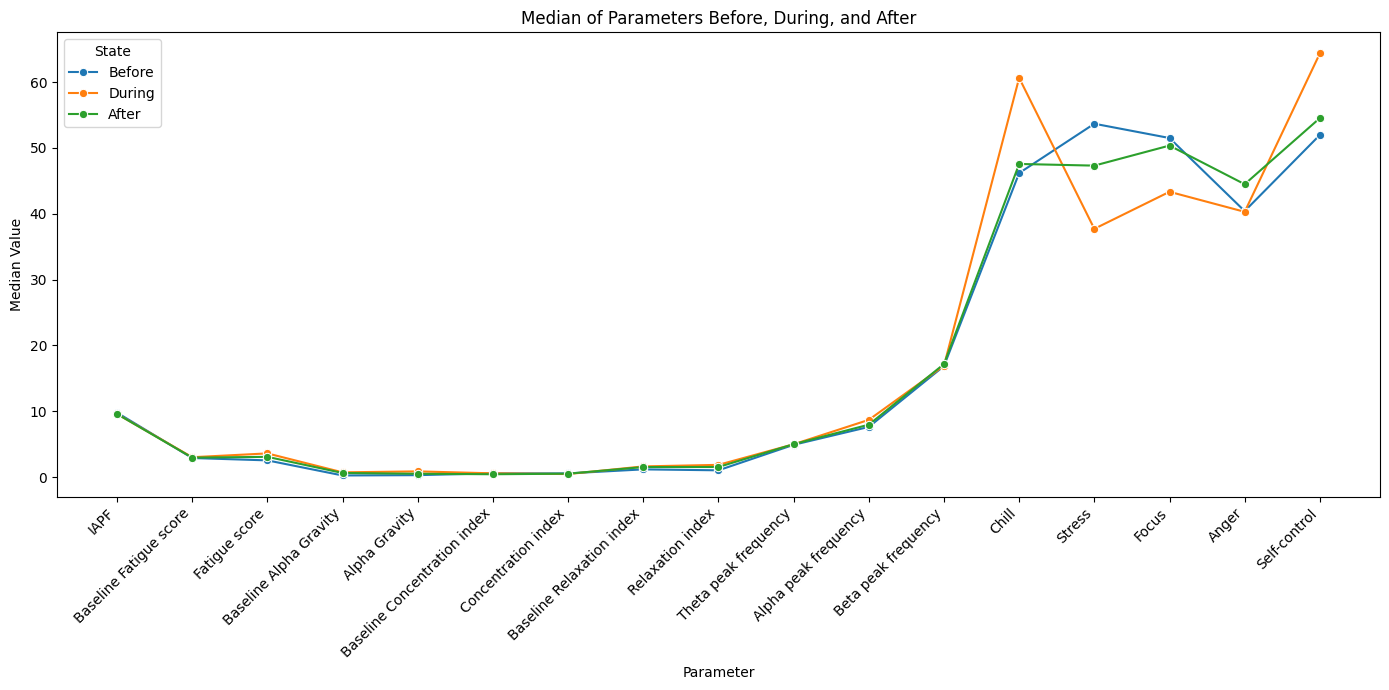

Observation counts used for median calculations:


,IAPF,Baseline Fatigue score,Fatigue score,Baseline Alpha Gravity,Alpha Gravity,Baseline Concentration index,Concentration index,Baseline Relaxation index,Relaxation index,Theta peak frequency,Alpha peak frequency,Beta peak frequency,Chill,Stress,Focus,Anger,Self-control,State
0,334,392,392,392,392,392,392,392,392,460,460,460,289,289,289,289,289,Before
1,595,618,618,618,618,618,618,618,618,682,682,682,550,550,550,550,550,During
2,310,336,336,336,336,336,336,336,336,387,387,387,270,270,270,270,270,After


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
before = pd.read_csv('data/before.csv')
during = pd.read_csv('data/during.csv')
after = pd.read_csv('data/after.csv')

# List of parameters to analyze
parameters = ['IAPF', 'Baseline Fatigue score', 'Fatigue score', 'Baseline Alpha Gravity', 'Alpha Gravity', 
              'Baseline Concentration index', 'Concentration index', 'Baseline Relaxation index', 
              'Relaxation index', 'Theta peak frequency', 'Alpha peak frequency', 'Beta peak frequency', 
              'Chill', 'Stress', 'Focus', 'Anger', 'Self-control']

# Function to calculate the median and count for each parameter
def calculate_medians_and_counts(df, label):
    medians = {param: df[param].median() for param in parameters}
    counts = {param: df[param].count() for param in parameters}
    medians['State'] = label
    counts['State'] = label
    return medians, counts

# Calculate medians and counts for each state
medians_before, counts_before = calculate_medians_and_counts(before, 'Before')
medians_during, counts_during = calculate_medians_and_counts(during, 'During')
medians_after, counts_after = calculate_medians_and_counts(after, 'After')

# Combine medians and counts into separate DataFrames
medians_df = pd.DataFrame([medians_before, medians_during, medians_after])
counts_df = pd.DataFrame([counts_before, counts_during, counts_after])

# Melt the DataFrames for Seaborn compatibility
medians_melted = pd.melt(medians_df, id_vars='State', value_vars=parameters, 
                         var_name='Parameter', value_name='Median Value')

counts_melted = pd.melt(counts_df, id_vars='State', value_vars=parameters, 
                        var_name='Parameter', value_name='Count')

# Merge the melted DataFrames to include counts with medians
combined_df = pd.merge(medians_melted, counts_melted, on=['State', 'Parameter'])

# Plotting using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x='Parameter', y='Median Value', hue='State', data=medians_melted, marker='o')

# Customize the plot
plt.xticks(rotation=45, ha="right")
plt.title('Median of Parameters Before, During, and After')
plt.tight_layout()

# Show the plot
plt.show()

# Print the DataFrame with observation counts
print("Observation counts used for median calculations:")
counts_df

In [1]:
from eeg_analysis import main

main.plot_hkm_medians()

Plot saved to: plots/hkm_median_plot.png
Observation counts used for median calculations:
   IAPF  Baseline Fatigue score  Fatigue score  Baseline Alpha Gravity  \
0   334                     392            392                     392   
1   595                     618            618                     618   
2   310                     336            336                     336   

   Alpha Gravity  Baseline Concentration index  Concentration index  \
0            392                           392                  392   
1            618                           618                  618   
2            336                           336                  336   

   Baseline Relaxation index  Relaxation index  Theta peak frequency  \
0                        392               392                   460   
1                        618               618                   682   
2                        336               336                   387   

   Alpha peak frequency  Beta peak freq